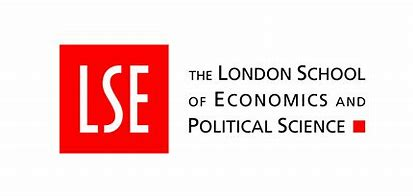



### The Project entails utilising ML and NLP techniques to extract relevant information regarding the BA History program at the London School of Economics (LSE).
The relevant details to be extracted include:
1. Degree type (undergraduate/postgraduate)
2. Application deadline
3. Duration of the degree
4. Admission eligibility/entry requirements
5. Overseas student fees
6. Brief degree description

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import spacy
import requests
import re
import string
from textblob import TextBlob
from collections import Counter

## Fetch Content

In [ ]:


# Fetch webpage content
url = "https://www.lse.ac.uk/study-at-lse/undergraduate/degree-programmes-2024/ba-history"
response = requests.get(url)
html_content = response.text
i=0
# Extract text using regular expressions

text = re.findall(r'<section>(.*?)</section>', html_content, re.DOTALL)
# Concatenate paragraphs into a single string
text = "\n".join(text)


## Cleaning Data

In [ ]:
# removing paragraph numbers
text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
text = re.sub('\n ','',str(text))
text = re.sub('\n',' ',str(text))
    # removing apostrophes
text = re.sub("'s",'',str(text))
    # removing hyphens
text = re.sub("-",' ',str(text))
text = re.sub("— ",'',str(text))
    # removing quotation marks
text = re.sub('\"','',str(text))
    # removing any reference to outside text
text = re.sub("[\(\[].*?[\)\]]", "", str(text))
text=re.sub(r'<.*?>', '', str(text))
# Print extracted text
print(text)

 For more information about tuition fees, usual standard offers and entry requirements, see the sections below.                                                                                 


## Named entity recognition method

In [ ]:

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
from spacy import displacy
displacy.render(doc, style="ent")

entities = [(ent.text,ent.label_) for ent in doc.ents]
df = pd.DataFrame(entities,columns=['VALUES','LABELS'])
#df = pd.DataFrame(entities)
dict = {'degree_type': entities[0], 'application_deadline': entities[1], 'duration': entities[2],'elements_fee': entities[3],'description_brief': entities[4],'requirements': entities[5]}
df = pd.DataFrame(dict)

Key 193 196 NORP
30 September 2024 373 390 DATE
20 June 2025 393 405 DATE
31 January 2024 431 446 DATE
Three years 460 471 DATE
2022 511 515 DATE
509/64/8:1 517 527 CARDINAL


## Save to excel file

In [ ]:
print(df)

#now save the dataframe to the disk
df.to_excel("outputlse.xlsx", index=False)



  degree_type application_deadline      duration     elements_fee  \
0         Key    30 September 2024  20 June 2025  31 January 2024   
1        NORP                 DATE          DATE             DATE   

  description_brief requirements  
0       Three years         2022  
1              DATE         DATE  
